In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


**Importing the dataset**

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.drop_duplicates()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
del df['User ID']

In [7]:
lr=LabelEncoder()
df['Gender']=lr.fit_transform(df['Gender'])
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [8]:
x=df.iloc[:,:3]
y=df.iloc[:,3]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

**Feature Scaling**

In [9]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(x_train)
x_train=scale.transform(x_train)
x_test=scale.transform(x_test)

**Fitting Decision Tree Classification to the Training set**

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)


DecisionTreeClassifier()

**Predicting the Test set results**

In [11]:
y_pred=dt.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0])

**Making the Confusion Matrix**

In [12]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
auroc=roc_auc_score(y_test,y_pred)
print(acc,f1,auroc)
print(confusion_matrix(y_test,y_pred))

0.8375 0.7346938775510204 0.7925824175824175
[[49  3]
 [10 18]]


**Visualising the Training set results**

[Text(0.5347222222222222, 0.9615384615384616, 'X[1] <= 0.709\ngini = 0.453\nsamples = 320\nvalue = [209, 111]'),
 Text(0.3194444444444444, 0.8846153846153846, 'X[2] <= 0.583\ngini = 0.279\nsamples = 239\nvalue = [199, 40]'),
 Text(0.19444444444444445, 0.8076923076923077, 'X[1] <= -0.056\ngini = 0.068\nsamples = 199\nvalue = [192, 7]'),
 Text(0.16666666666666666, 0.7307692307692307, 'gini = 0.0\nsamples = 137\nvalue = [137, 0]'),
 Text(0.2222222222222222, 0.7307692307692307, 'X[2] <= -0.097\ngini = 0.2\nsamples = 62\nvalue = [55, 7]'),
 Text(0.19444444444444445, 0.6538461538461539, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.25, 0.6538461538461539, 'X[2] <= 0.376\ngini = 0.366\nsamples = 29\nvalue = [22, 7]'),
 Text(0.2222222222222222, 0.5769230769230769, 'X[1] <= 0.422\ngini = 0.337\nsamples = 28\nvalue = [22, 6]'),
 Text(0.1388888888888889, 0.5, 'X[2] <= -0.008\ngini = 0.287\nsamples = 23\nvalue = [19, 4]'),
 Text(0.1111111111111111, 0.4230769230769231, 'gini = 0.0\nsamples 

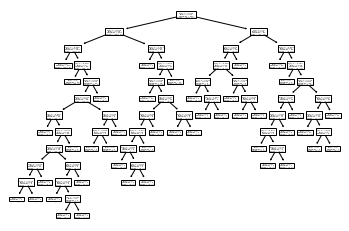

In [ ]:
from sklearn import tree
tree.plot_tree(dt)

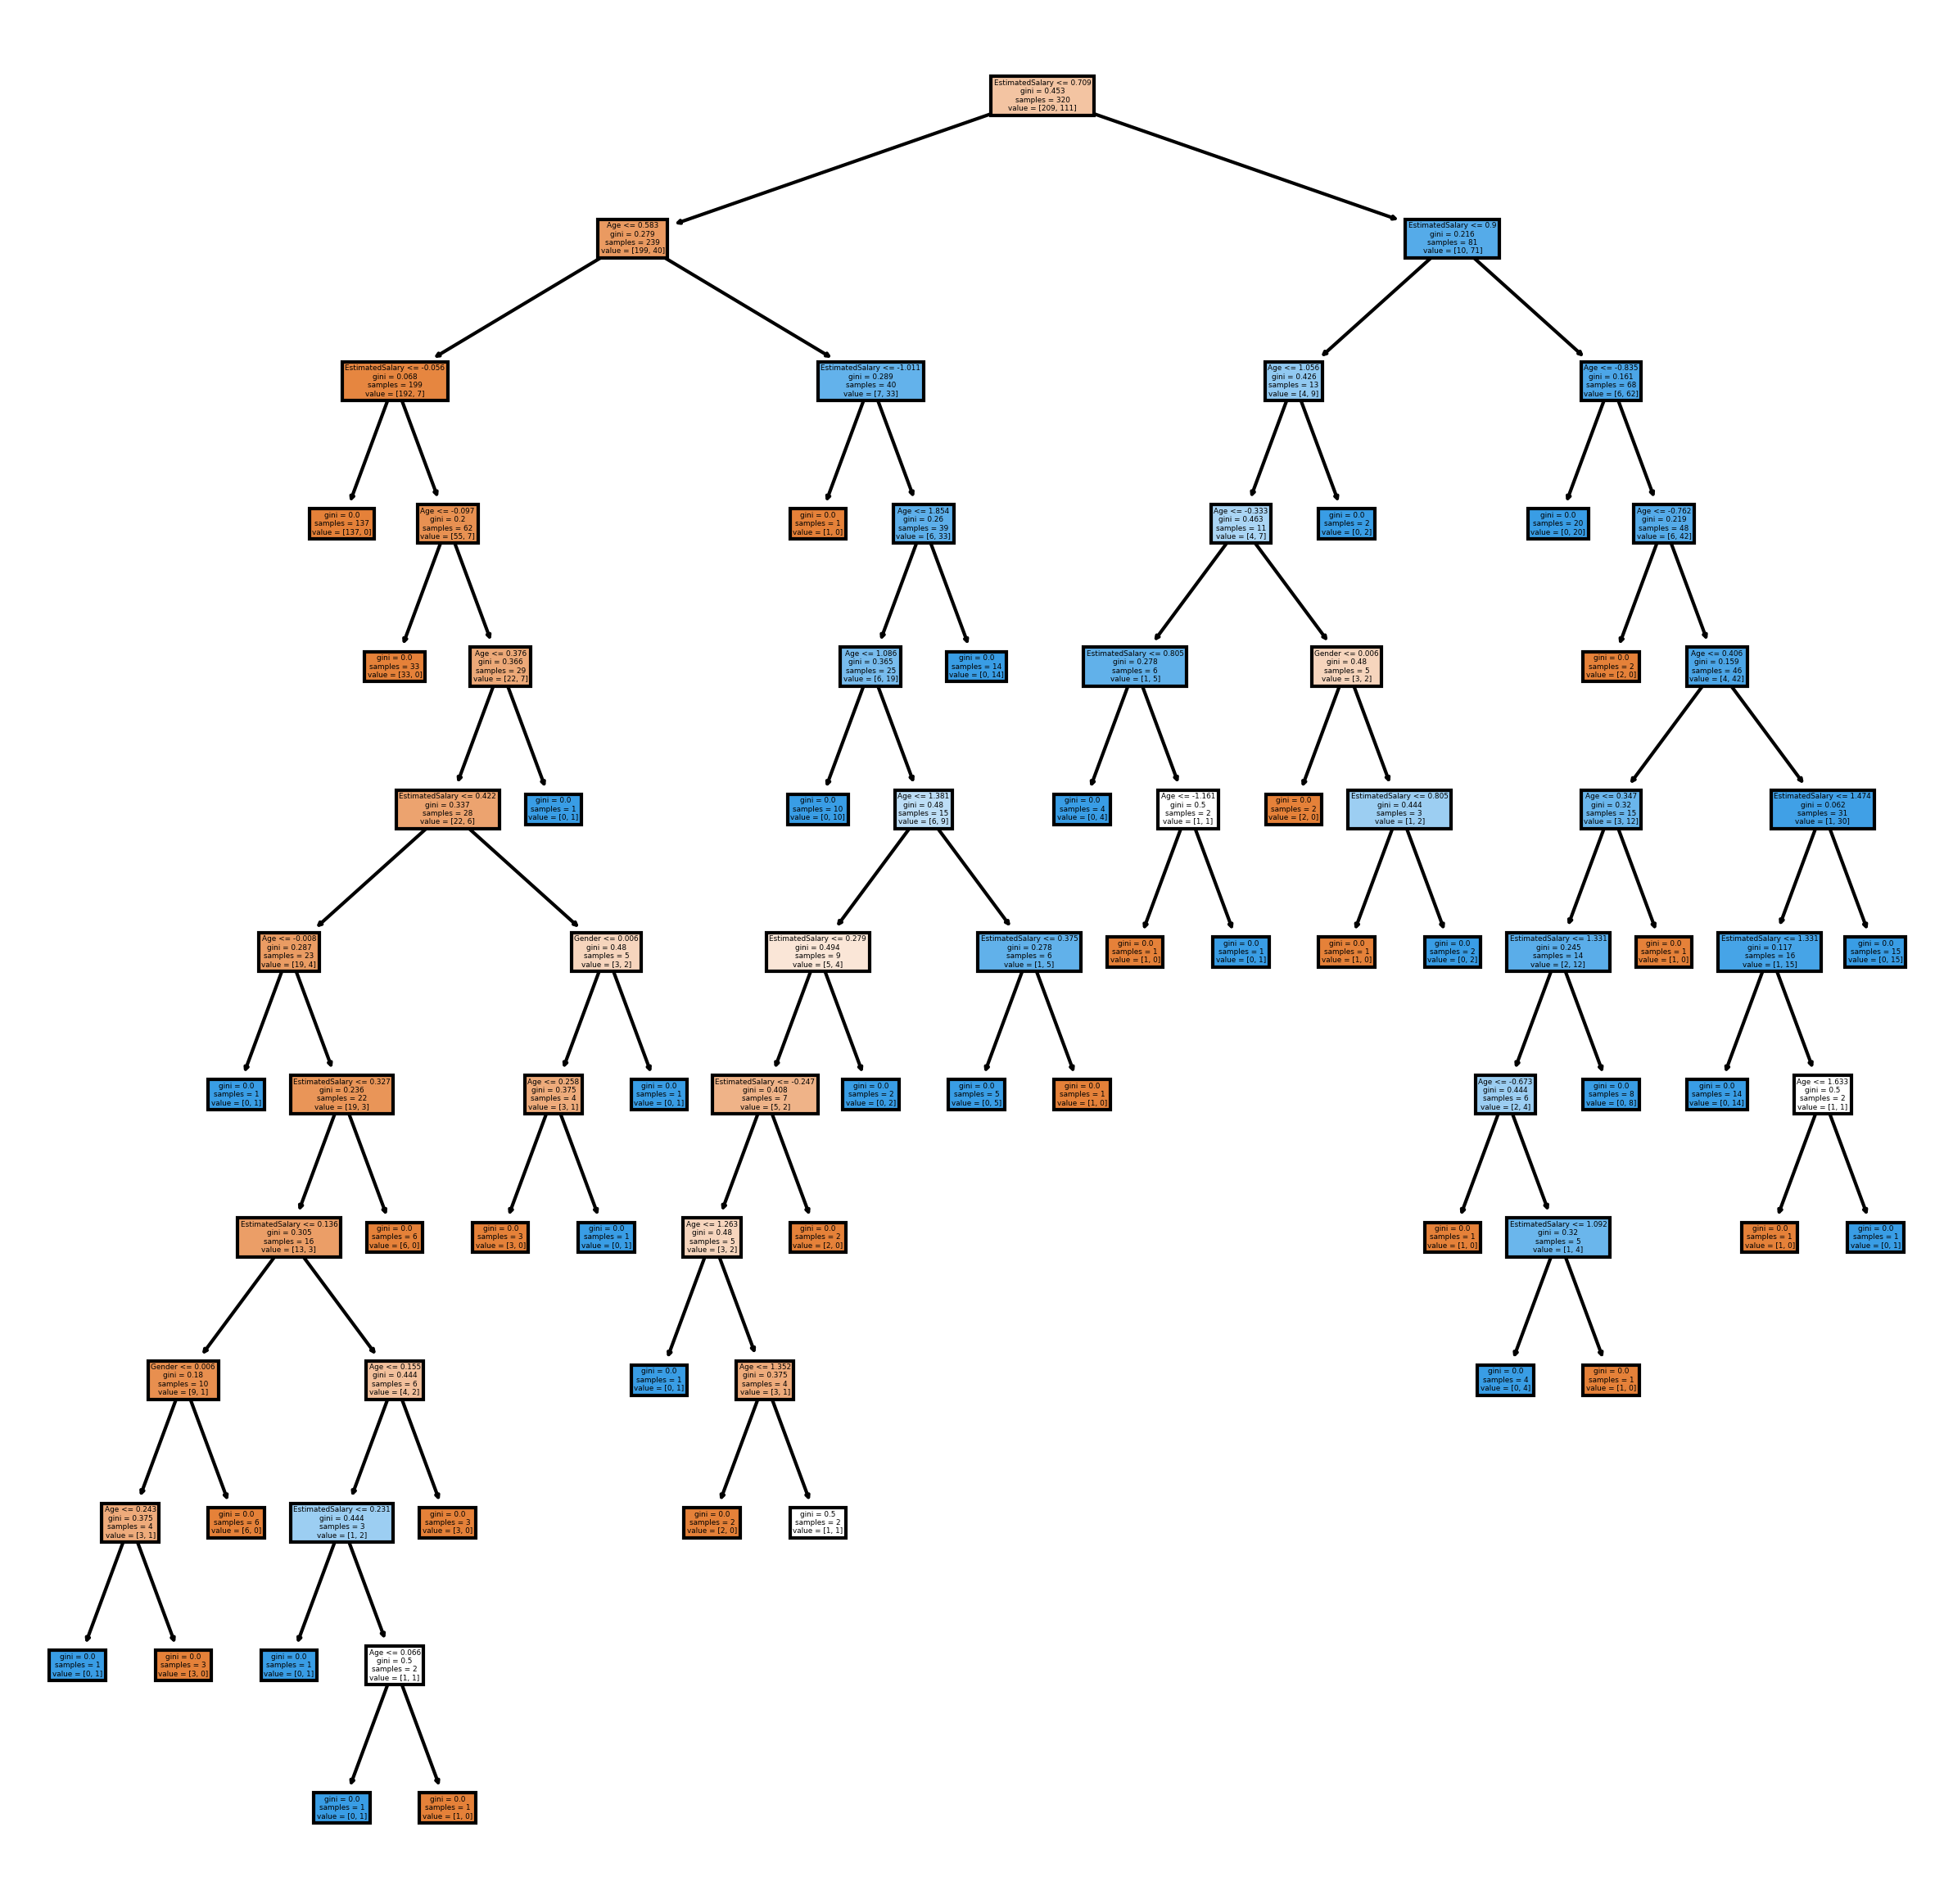

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(dt,
               feature_names = ['Gender','EstimatedSalary','Age'],
               filled = True);
fig.savefig('imagename.png')

**Visualising the Test set results**

In [ ]:
dt1=DecisionTreeClassifier()
dt1.fit(x_test,y_test)

DecisionTreeClassifier()

[Text(0.5384615384615384, 0.9375, 'X[1] <= 0.693\ngini = 0.455\nsamples = 80\nvalue = [52, 28]'),
 Text(0.23076923076923078, 0.8125, 'X[2] <= 1.318\ngini = 0.171\nsamples = 53\nvalue = [48, 5]'),
 Text(0.15384615384615385, 0.6875, 'X[2] <= 0.217\ngini = 0.077\nsamples = 50\nvalue = [48, 2]'),
 Text(0.07692307692307693, 0.5625, 'gini = 0.0\nsamples = 39\nvalue = [39, 0]'),
 Text(0.23076923076923078, 0.5625, 'X[1] <= -0.381\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.15384615384615385, 0.4375, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.3076923076923077, 0.4375, 'X[1] <= -0.137\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.23076923076923078, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.38461538461538464, 0.3125, 'X[1] <= 0.253\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3076923076923077, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.46153846153846156, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.30769230769230

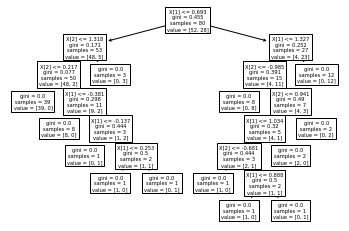

In [ ]:
from sklearn import tree
tree.plot_tree(dt1)

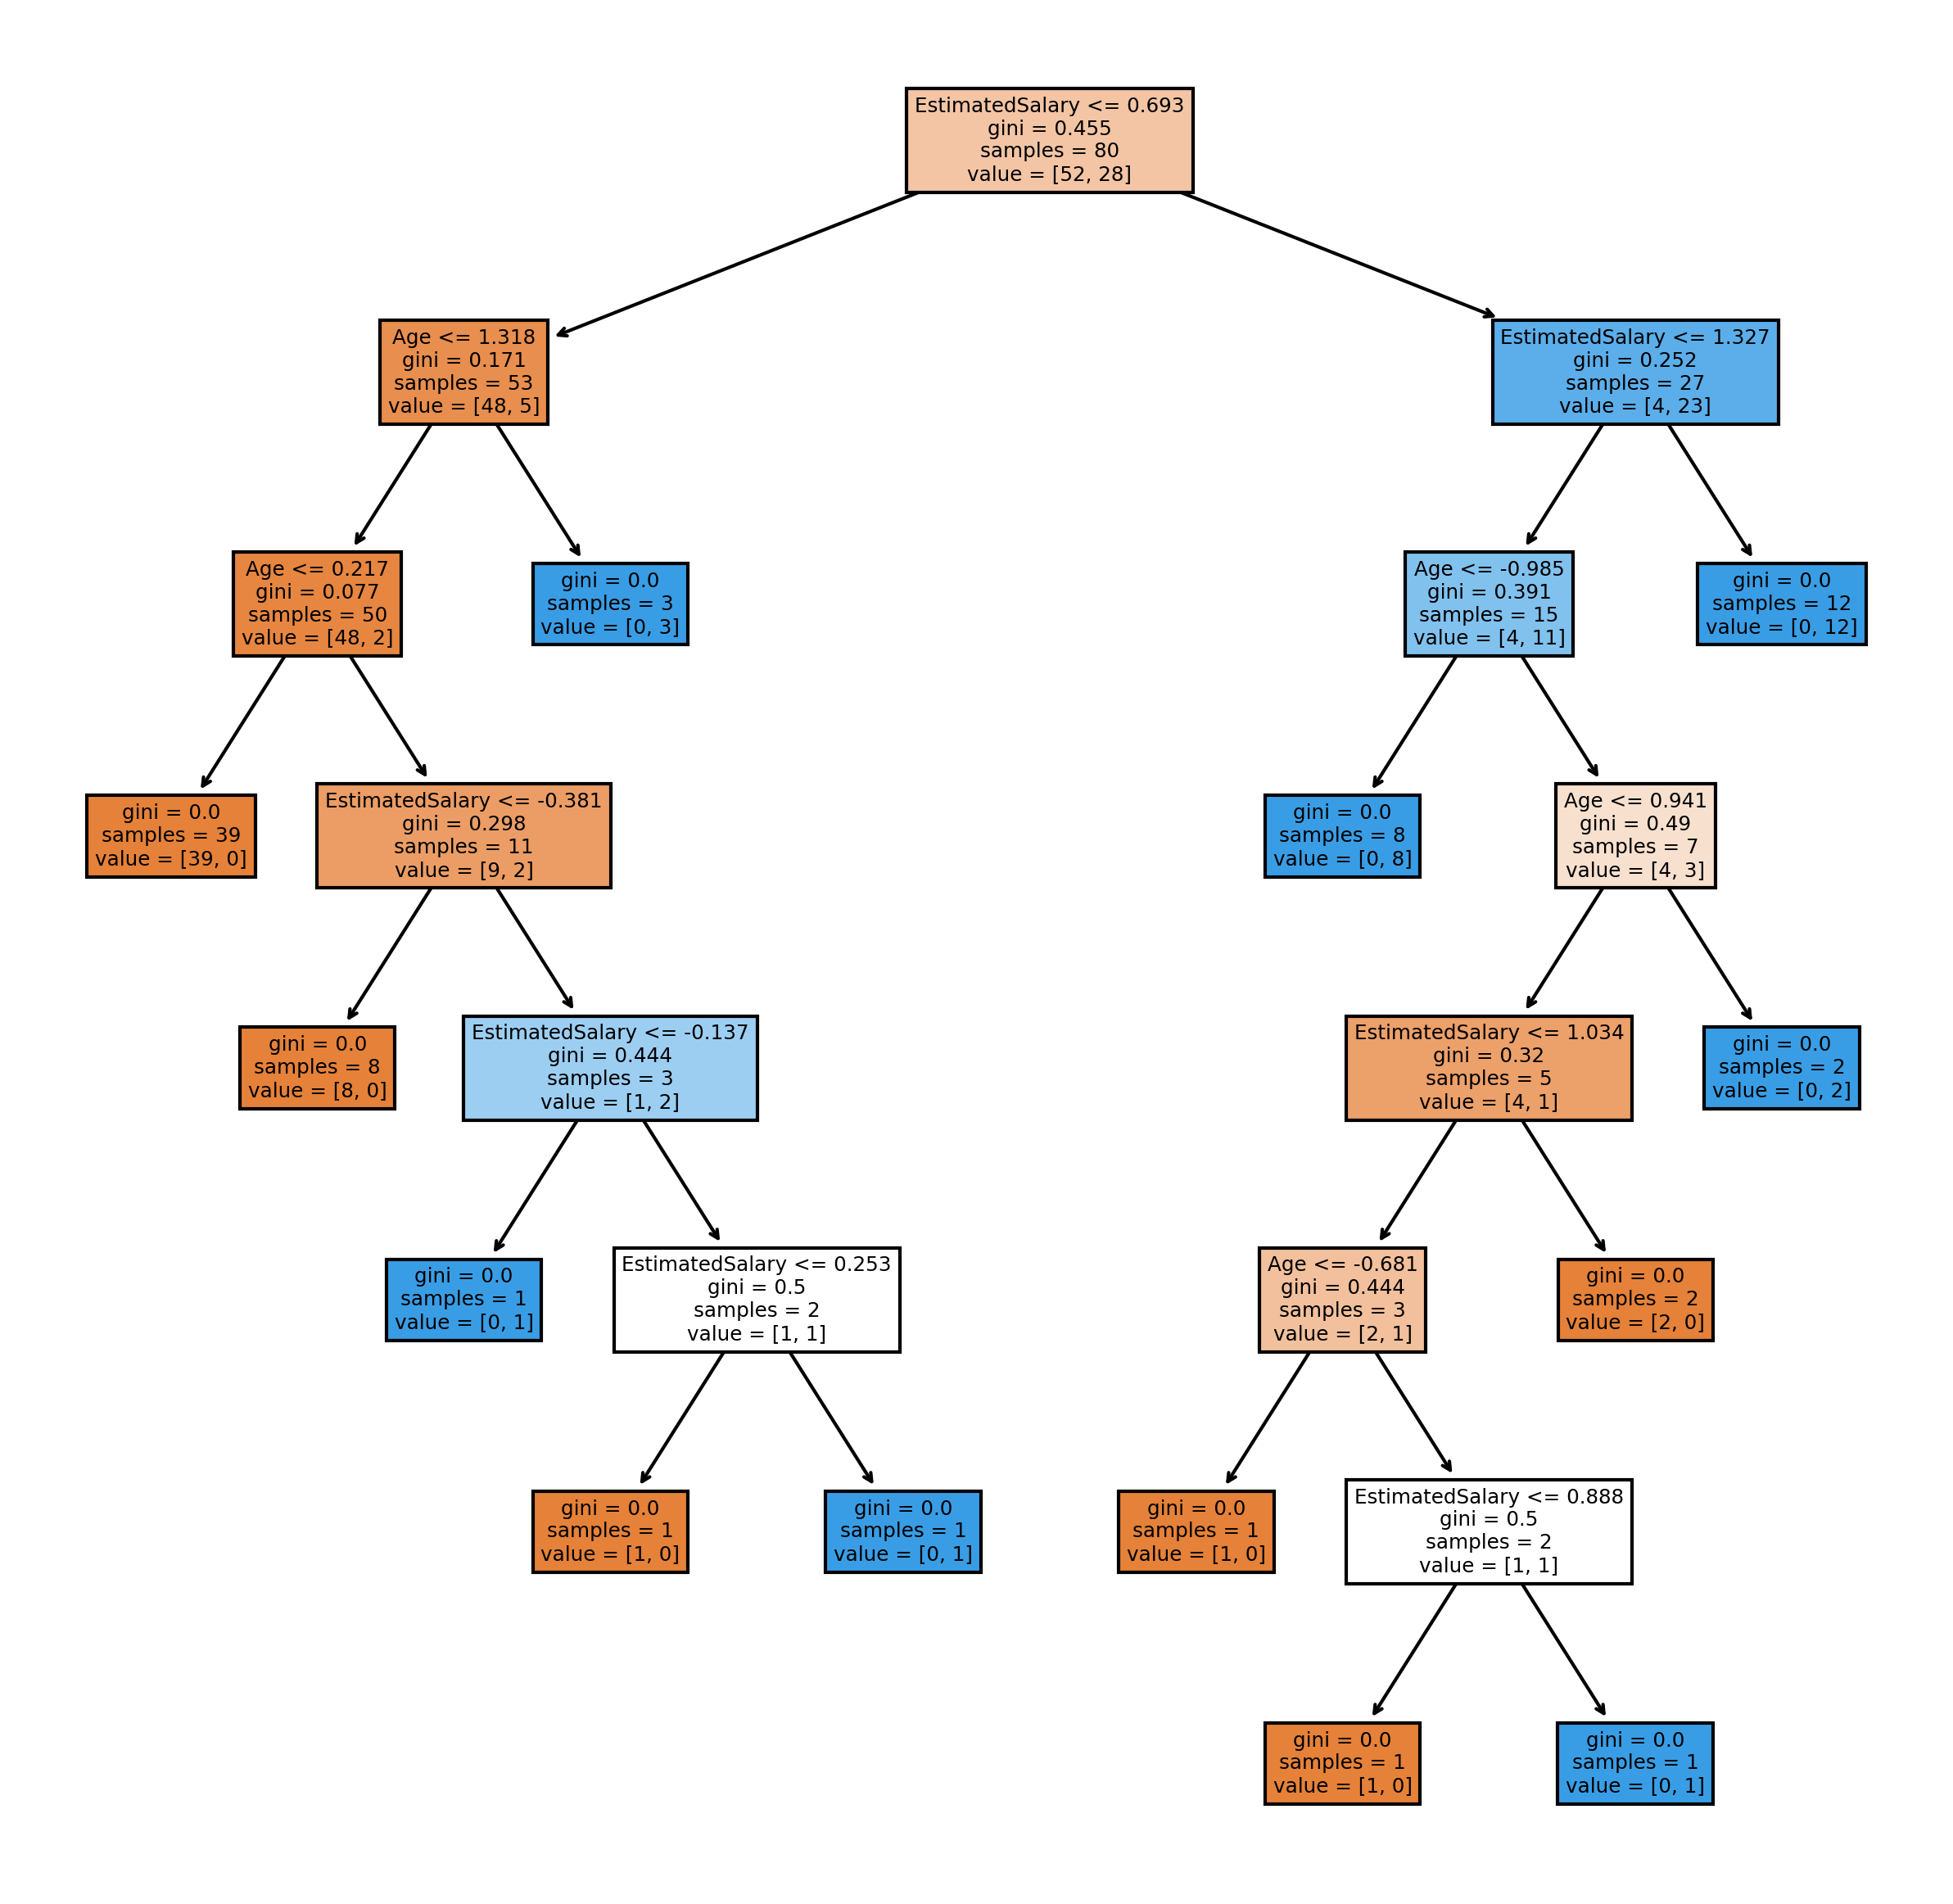

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(dt1,
               feature_names = ['Gender','EstimatedSalary','Age'],
               filled = True);
fig.savefig('imagename.png')